In [1]:
# Loading libraries

import xarray as xr
import matplotlib.pyplot as plt
import glob

# Load Control Data

In [2]:
# Loading datasets

control_path = glob.glob('/data/keeling/a/pappup2/a/CESM/cam5_new/CESM_output_data/atm/hist/*')
control_path_last18 = control_path[24:240] #Getting years 3-20
control_data = xr.open_mfdataset(control_path_last18,combine="by_coords",use_cftime=True)
control_data

<xarray.Dataset>
Dimensions:        (lev: 30, time: 216, ilev: 31, lat: 96, lon: 144, slat: 95,
                    slon: 144, nbnd: 2)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time           (time) object 0003-02-01 00:00:00 ... 0021-01-01 00:00:00
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables: (12/163)
    hyam           (time, lev) float64 dask.array<chunksize=(1, 30), meta=np.ndarray>
    hybm           (time, lev) float64 dask.array<chunksize=(1, 30), meta=np.ndarray>
    hyai           (time, ilev) float64 dask.array<chunksize=(1, 31), meta=np.ndarray>
    hybi           (time, ilev) float64 dask.array<chunksize=(1, 31), meta=np.ndarray>
    P0             (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    date           (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...             ...
    pom_a1_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    so4_a1_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    so4_a2_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    so4_a3_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a1_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a2_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             cam5_new
    title:            UNSET
    logname:          pappup2
    host:             keeling-j51
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /data/keeling/a/pappup2/a/CESM/CESM_input_data/atm/cam/...
    topography_file:  /data/keeling/a/pappup2/a/CESM/CESM_input_data/atm/cam/...

In [3]:
#Average over time
control = control_data.mean('time')
control

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, lat: 96, lon: 144, slat: 95, slon: 144)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Data variables: (12/160)
    hyam           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybm           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hyai           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybi           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    P0             float64 1e+05
    date           float64 dask.array<chunksize=(), meta=np.ndarray>
    ...             ...
    pom_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a3_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>

### Control Variables

In [4]:
control_SST = control.TS.mean('lon') #Sea surface temperature
control_Rtoa = control.FSNT.mean('lon') - control.FLNT.mean('lon') #Top of atmosphere radiation - incoming SW - outgoing LW
control_Qs = control.FSNS.mean('lon') - control.FLNS.mean('lon') + control.SHFLX.mean('lon') + control.LHFLX.mean('lon') #Surface radiation
# FSNS - Net solar flux at surface - positive is down, so needs to be positive
# FLNS - Net longwave flux at surface - positive is up, so needs to be negative
# SHFLX - Surface Sensible heat flux - Positive is down? - No confirmation yet...
# LHFLX - Surface latent heat flux - Positive is down? - No confirmation
control_fick = control_Qs - control_Rtoa #Fickian diffusion across latitudes
control_T = control.T.mean('lon') # Temperature in the vertical

# Polar Perturbations

In [5]:
# Load datasets

pole_path = glob.glob('/data/keeling/a/mailes2/a/CESM_DATA/aqua_poleperturb/outputdata/atm/hist/*')
pole_path_last18 = pole_path[24:240] # Get years 3-20
pole_data = xr.open_mfdataset(pole_path_last18,combine="by_coords",use_cftime=True)
pole_data

<xarray.Dataset>
Dimensions:        (lev: 30, time: 216, ilev: 31, lat: 96, lon: 144, slat: 95,
                    slon: 144, nbnd: 2)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time           (time) object 0003-02-01 00:00:00 ... 0021-01-01 00:00:00
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables: (12/163)
    hyam           (time, lev) float64 dask.array<chunksize=(1, 30), meta=np.ndarray>
    hybm           (time, lev) float64 dask.array<chunksize=(1, 30), meta=np.ndarray>
    hyai           (time, ilev) float64 dask.array<chunksize=(1, 31), meta=np.ndarray>
    hybi           (time, ilev) float64 dask.array<chunksize=(1, 31), meta=np.ndarray>
    P0             (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    date           (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    ...             ...
    pom_a1_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    so4_a1_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    so4_a2_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    so4_a3_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a1_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a2_SRF     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             aqua_poleperturb
    title:            UNSET
    logname:          mailes2
    host:             keeling-j29
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /data/keeling/a/mailes2/a/CESM_DATA/CESM_INPUT_DATA/atm...
    topography_file:  /data/keeling/a/mailes2/a/CESM_DATA/CESM_INPUT_DATA/atm...

In [6]:
poles = pole_data.mean('time') # Average over the last 18 years
poles

<xarray.Dataset>
Dimensions:        (lev: 30, ilev: 31, lat: 96, lon: 144, slat: 95, slon: 144)
Coordinates:
  * lev            (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev           (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * slat           (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon           (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Data variables: (12/160)
    hyam           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybm           (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hyai           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybi           (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    P0             float64 1e+05
    date           float64 dask.array<chunksize=(), meta=np.ndarray>
    ...             ...
    pom_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    so4_a3_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a1_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    soa_a2_SRF     (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>

## Surface Temperature

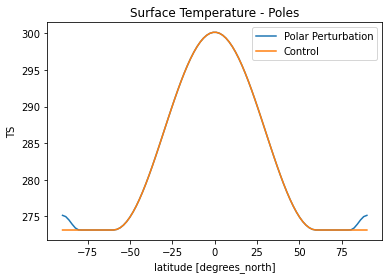

In [8]:
poles.mean('lon').TS.plot(label='Polar Perturbation')
control_SST.plot(label='Control')
plt.title('Surface Temperature - Poles')
plt.legend()

Text(0.5, 1.0, 'Change in SST - Polar Perturbation')

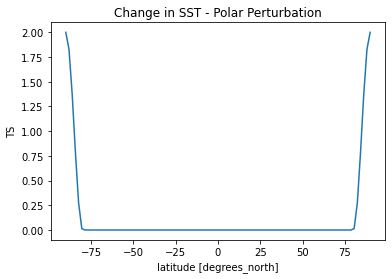

In [9]:
pole_deltaSST = poles.mean('lon').TS - control_SST
pole_deltaSST.plot()
plt.title('Change in SST - Polar Perturbation')

## Radiation

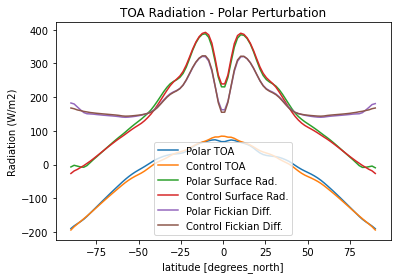

In [19]:
poles_TOA = poles.FSNT.mean('lon') - poles.FLNT.mean('lon')
poles_Qs = poles.FSNS.mean('lon') - poles.FLNS.mean('lon') + poles.SHFLX.mean('lon') + poles.LHFLX.mean('lon')
poles_fick = poles_Qs - poles_TOA

poles_TOA.plot(label='Polar TOA')
control_Rtoa.plot(label='Control TOA')
poles_Qs.plot(label='Polar Surface Rad.')
control_Qs.plot(label='Control Surface Rad.')
poles_fick.plot(label='Polar Fickian Diff.')
control_fick.plot(label='Control Fickian Diff.')
plt.title('TOA Radiation - Polar Perturbation')
plt.ylabel('Radiation (W/m2)')
plt.legend()

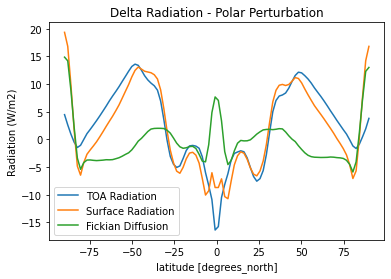

In [20]:
poles_deltaTOA = poles_TOA - control_Rtoa
poles_deltaQs = poles_Qs - control_Qs
poles_deltafick = poles_fick - control_fick

poles_deltaTOA.plot(label='TOA Radiation')
poles_deltaQs.plot(label='Surface Radiation')
poles_deltafick.plot(label='Fickian Diffusion')
plt.title('Delta Radiation - Polar Perturbation')
plt.ylabel('Radiation (W/m2)')
plt.legend()

## Temperature

Text(0.5, 1.0, 'Temperature with Polar Perturbation')

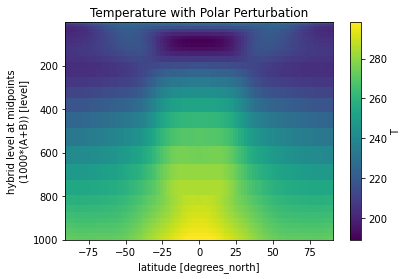

In [15]:
poles.T.mean('lon').plot(yincrease=False)
plt.title('Temperature with Polar Perturbation')

Text(0.5, 1.0, 'Delta T due to Polar Perturbation')

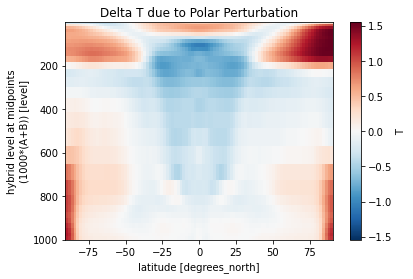

In [18]:
poles_deltaT = poles.T.mean('lon') - control_T
poles_deltaT.plot(yincrease=False, cmap="RdBu_r")
plt.title('Delta T due to Polar Perturbation')

# Control Variable Testing

Text(0.5, 1.0, 'Sea Surface Temperature - Control')

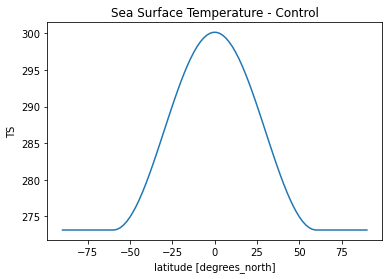

In [30]:
control.TS.mean('lon').plot()
plt.title('Sea Surface Temperature - Control')

Text(0.5, 1.0, 'Net Shortwave Flux at TOA - Control')

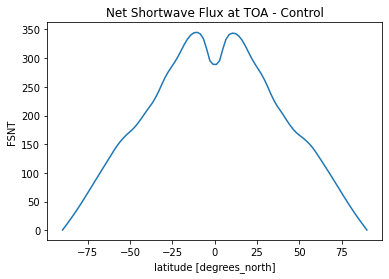

In [16]:
control.FSNT.mean('lon').plot()
plt.title('Net Shortwave Flux at TOA - Control') # Positive is down

Text(0.5, 1.0, 'Net Longwave Flux at TOA - Control')

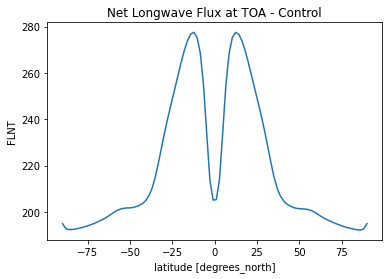

In [17]:
control.FLNT.mean('lon').plot()
plt.title('Net Longwave Flux at TOA - Control') #Positive is up

Text(0.5, 1.0, 'Downwelling longwave flux at surface - Control')

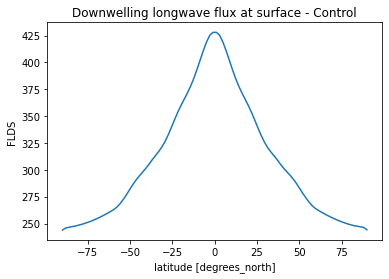

In [15]:
control.FLDS.mean('lon').plot()
plt.title('Downwelling longwave flux at surface - Control') #Positive is up

Text(0.5, 1.0, 'Net solar flux at surface - Control')

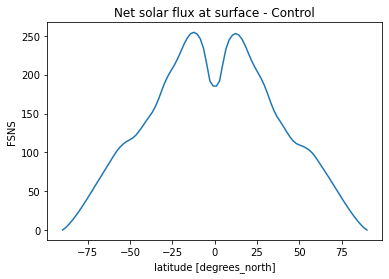

In [18]:
control.FSNS.mean('lon').plot()
plt.title('Net solar flux at surface - Control') #Positive is down

Text(0.5, 1.0, 'Net Longwave Flux at Surface - Control')

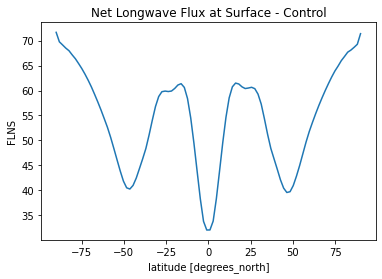

In [29]:
control.FLNS.mean('lon').plot()
plt.title('Net Longwave Flux at Surface - Control') #Positive is up

Text(0.5, 1.0, 'Surface Sensible Heat Flux')

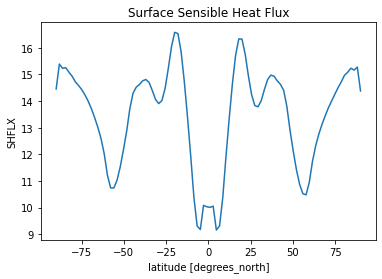

In [21]:
control.SHFLX.mean('lon').plot()
plt.title('Surface Sensible Heat Flux')

Text(0.5, 1.0, 'Surface Latent Heat Flux')

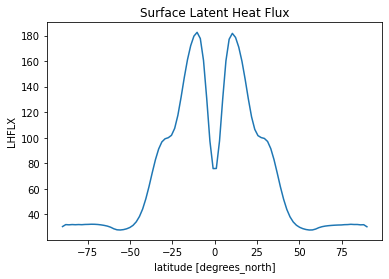

In [22]:
control.LHFLX.mean('lon').plot()
plt.title('Surface Latent Heat Flux') #Seems like positive is down

Text(0.5, 1.0, 'Net Surface Heat Flux - Control')

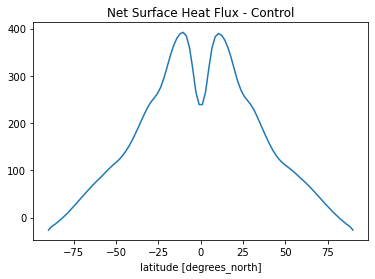

In [25]:
control_Qs = control.FSNS.mean('lon') - control.FLNS.mean('lon') + control.SHFLX.mean('lon') + control.LHFLX.mean('lon')

# Positive is down.
# FSNS - Net solar flux at surface - positive is down, so needs to be positive
# FLNS - Net longwave flux at surface - positive is up, so needs to be negative
# SHFLX - Surface Sensible heat flux - Positive is down? - No confirmation yet...
# LHFLX - Surface latent heat flux - Positive is down? - No confirmation

control_Qs.plot()
plt.title('Net Surface Heat Flux - Control')

Text(0.5, 1.0, 'Fickian diffusion to other latitudes - Control')

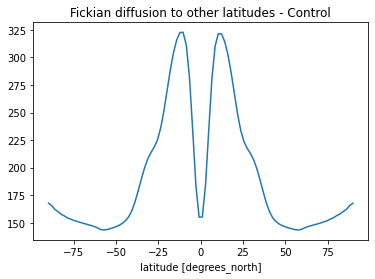

In [26]:
control_Rtoa = control.FSNT.mean('lon') - control.FLNT.mean('lon')
control_Qs = control.FSNS.mean('lon') - control.FLNS.mean('lon') + control.SHFLX.mean('lon') + control.LHFLX.mean('lon')
control_fick = control_Qs - control_Rtoa #Fickian diffusion across latitudes - outwards to other lats
control_fick.plot()
plt.title('Fickian diffusion to other latitudes - Control')

Text(0.5, 1.0, 'Temperature - Control')

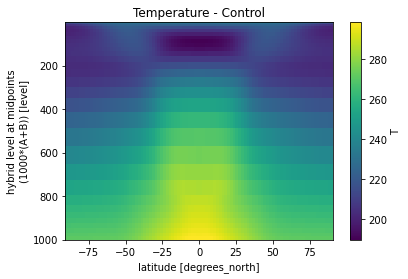

In [28]:
control_T = control.T.mean('lon')
control_T.plot(yincrease=False)
plt.title('Temperature - Control')